In [1]:
#basic libraries
import os
import pandas as pd 
import numpy as np
import requests
import json
import glob
import pickle

#Visiualization and ML libraries
import sklearn
import matplotlib.pyplot as plt

from scipy.stats import norm
import statistics
import seaborn as sns

In [2]:
cwd = os.getcwd()  
files = os.listdir(cwd)

print("Files in %r: %s" % (cwd, files))

Files in '/Users/sandrobarreshamers/Thesis_IS_fake_news': ['expecting the data.ipynb', '.DS_Store', '.ipynb_checkpoints', '.git', 'Data', 'Notebooks']


In [3]:
df_computed_nlp_news = pd.read_csv('../Thesis_IS_fake_news/Data/dummy_data_news_articles/computed_pipe_line_dataset/computed_test.csv')
print(df_computed_nlp_news)

                                                   text label  \
0     print they should pay all the back all the mon...  Real   
1     why did attorney general loretta lynch plead t...  Real   
2     red state  \nfox news sunday reported this mor...  Real   
3     email kayla mueller was a prisoner and torture...  Real   
4     email healthcare reform to make america great ...  Real   
...                                                 ...   ...   
2045  check out hillarythemed haunted house anticlin...  Real   
2046  good samaritan wearing indian headdress disarm...  Real   
2047  skype sex scam  a fortune built on shame moroc...  Real   
2048  posted by eddie while the skyhigh potency may ...  Real   
2049  billion even after they are known to be keepin...  Real   

      flesch_kincaid_reading_ease  compressed_size  vader_neg  vader_neu  \
0                       67.530000          35501.0      0.091      0.804   
1                        5.889000         107554.0      0.085      

Number of fake rows: 1292
Number of real rows: 758


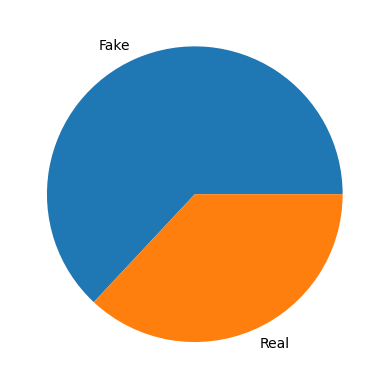

In [4]:
count_fake = len(df_computed_nlp_news[df_computed_nlp_news['label']=='Fake'])
print("Number of fake rows:", count_fake)



count_real = len(df_computed_nlp_news[df_computed_nlp_news['label']=='Real'])
print("Number of real rows:", count_real)



y = np.array([count_fake, count_real])
mylabels = ["Fake", "Real"]

plt.pie(y, labels = mylabels)
plt.show()

In [5]:
def average_feature_values(label):
    avg_fk_score_fake = df_computed_nlp_news.groupby('label')['flesch_kincaid_reading_ease'].mean()[label]
    avg_compressed_size_fake = df_computed_nlp_news.groupby('label')['compressed_size'].mean()[label]
    avg_neg_score_fake = df_computed_nlp_news.groupby('label')['vader_neg'].mean()[label]
    avg_neu_score_fake = df_computed_nlp_news.groupby('label')['vader_neu'].mean()[label]
    avg_pos_score_fake = df_computed_nlp_news.groupby('label')['vader_pos'].mean()[label]
    avg_com_score_fake = df_computed_nlp_news.groupby('label')['vader_compound'].mean()[label]

    return [avg_fk_score_fake,  avg_compressed_size_fake, avg_neg_score_fake, avg_neu_score_fake, avg_pos_score_fake, avg_com_score_fake]

fake_values = average_feature_values('Fake')
real_values = average_feature_values('Real')

data = {'Measure Type': ['Flesch-Kincaid Reading Ease', 'Compressed Size', 'Negative Sentiment Score', 'Neutral Sentiment Score', 'Positive Sentiment Score', 'Compound Sentiment Score'],
        'Fake Values': fake_values,
        'Real Values': real_values}

df = pd.DataFrame(data)


print(df)

                  Measure Type    Fake Values    Real Values
0  Flesch-Kincaid Reading Ease      37.961361      36.867858
1              Compressed Size  182072.044118  210642.522427
2     Negative Sentiment Score       0.087261       0.094889
3      Neutral Sentiment Score       0.821463       0.818142
4     Positive Sentiment Score       0.091278       0.086975
5     Compound Sentiment Score       0.013474      -0.110985


In [6]:
#generic datasets
fake_df = df_computed_nlp_news[df_computed_nlp_news['label'] == 'Fake']
real_df = df_computed_nlp_news[df_computed_nlp_news['label'] == 'Real']

### FKR fake

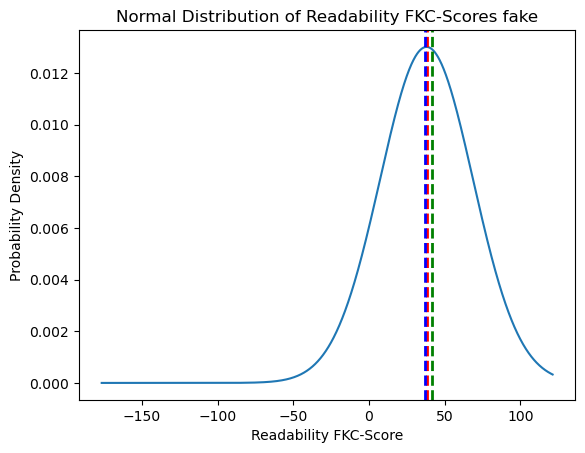

mean :37.961361313164964
mode : 36.62000000000003
std: 30.661422489947412
median: 41.48032146491255


In [7]:
fke_values_fake = fake_df['flesch_kincaid_reading_ease'].tolist()

mo = statistics.mode(fke_values_fake)
mu = np.mean(fke_values_fake)
sigma = np.std(fke_values_fake)
me = statistics.median(fke_values_fake)

x = np.linspace(min(fke_values_fake), max(fke_values_fake), 2050)
y = norm.pdf(x, mu, sigma)

# Plot the distribution
plt.plot(x, y)
plt.title('Normal Distribution of Readability FKC-Scores fake')
plt.xlabel('Readability FKC-Score')
plt.ylabel('Probability Density')
plt.axvline(mu, color='red', linestyle='dashed', linewidth=2)
plt.axvline(mo, color='blue', linestyle='dashed', linewidth=2)
plt.axvline(me, color='green', linestyle='dashed', linewidth=2)
plt.show()
print(f'mean :{mu}')
print(f'mode : {mo}')
print(f'std: {sigma}')
print(f'median: {me}')

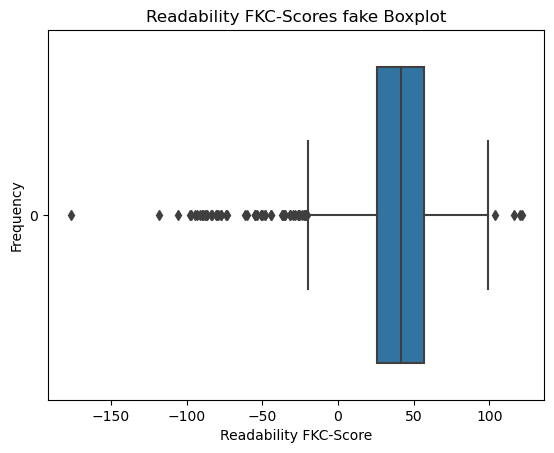

In [8]:
sns.boxplot(fke_values_fake, orient='h')
# add a title and axis labels
plt.title('Readability FKC-Scores fake Boxplot')
plt.xlabel('Readability FKC-Score')
plt.ylabel('Frequency')

# display the plot
plt.show()

In [9]:
my_list = [22, 55, 99, 105, 155, 205]

fke_values_fake_formatted = [
    item for item in fke_values_fake
    if item > 0
    and item < 100
]


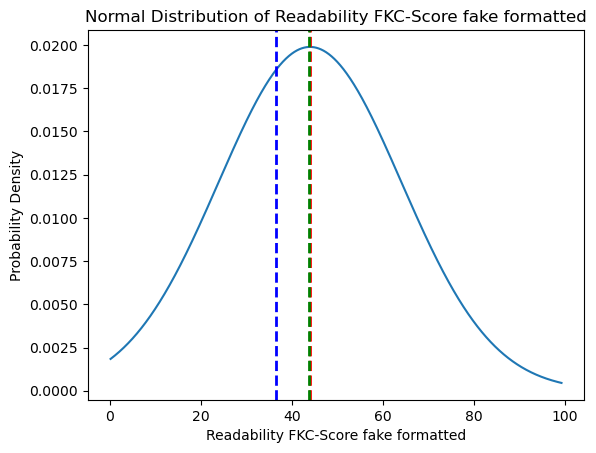

mean :43.9939149482395
mode : 36.62000000000003
std: 20.059628440785183
median: 43.72456980211544


In [10]:
mo = statistics.mode(fke_values_fake_formatted)
mu = np.mean(fke_values_fake_formatted)
sigma = np.std(fke_values_fake_formatted)
me = statistics.median(fke_values_fake_formatted)

x = np.linspace(min(fke_values_fake_formatted), max(fke_values_fake_formatted), 2050)
y = norm.pdf(x, mu, sigma)

# Plot the distribution
plt.plot(x, y)
plt.title('Normal Distribution of Readability FKC-Score fake formatted')
plt.xlabel('Readability FKC-Score fake formatted')
plt.ylabel('Probability Density')
plt.axvline(mu, color='red', linestyle='dashed', linewidth=2)
plt.axvline(mo, color='blue', linestyle='dashed', linewidth=2)
plt.axvline(me, color='green', linestyle='dashed', linewidth=2)
plt.show()
print(f'mean :{mu}')
print(f'mode : {mo}')
print(f'std: {sigma}')
print(f'median: {me}')

### FKR real

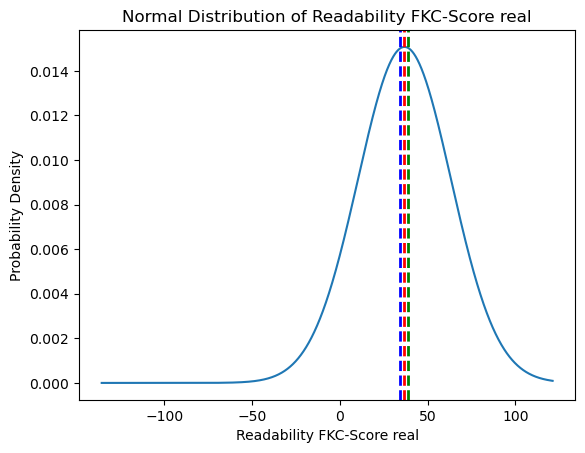

mean :36.867858213820895
mode : 34.255000000000024
std: 26.4627977416134
median: 38.76684205064346


In [11]:
fke_values_real = real_df['flesch_kincaid_reading_ease'].tolist()

mo = statistics.mode(fke_values_real)
mu = np.mean(fke_values_real)
sigma = np.std(fke_values_real)
me = statistics.median(fke_values_real)

x = np.linspace(min(fke_values_real), max(fke_values_real), 2050)
y = norm.pdf(x, mu, sigma)

# Plot the distribution
plt.plot(x, y)
plt.title('Normal Distribution of Readability FKC-Score real')
plt.xlabel('Readability FKC-Score real')
plt.ylabel('Probability Density')
plt.axvline(mu, color='red', linestyle='dashed', linewidth=2)
plt.axvline(mo, color='blue', linestyle='dashed', linewidth=2)
plt.axvline(me, color='green', linestyle='dashed', linewidth=2)
plt.show()
print(f'mean :{mu}')
print(f'mode : {mo}')
print(f'std: {sigma}')
print(f'median: {me}')

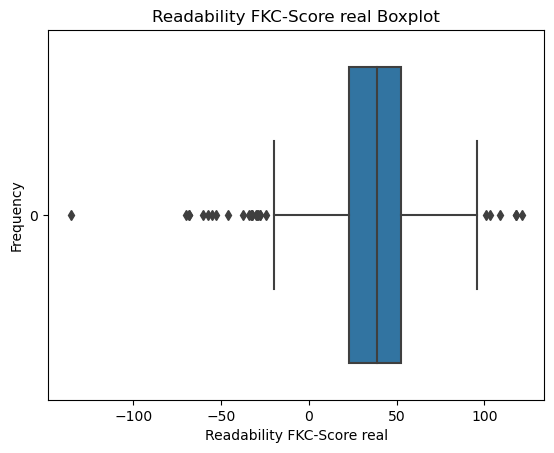

In [12]:
sns.boxplot(fke_values_real, orient='h')
plt.title('Readability FKC-Score real Boxplot')
plt.xlabel('Readability FKC-Score real')
plt.ylabel('Frequency')

# display the plot
plt.show()

In [13]:
my_list = [22, 55, 99, 105, 155, 205]

fke_values_real_formatted = [
    item for item in fke_values_real
    if item > 0
    and item < 100
]

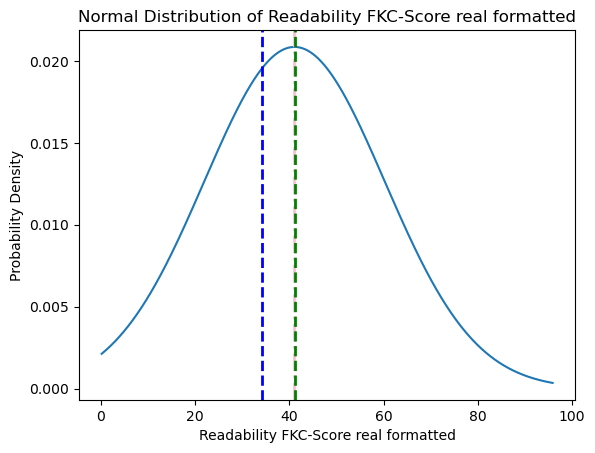

mean :41.11250653603378
mode : 34.255000000000024
std: 19.13393497212821
median: 41.18566595059079


In [14]:
mo = statistics.mode(fke_values_real_formatted)
mu = np.mean(fke_values_real_formatted)
sigma = np.std(fke_values_real_formatted)
me = statistics.median(fke_values_real_formatted)

x = np.linspace(min(fke_values_real_formatted), max(fke_values_real_formatted), 2050)
y = norm.pdf(x, mu, sigma)

# Plot the distribution
plt.plot(x, y)
plt.title('Normal Distribution of Readability FKC-Score real formatted')
plt.xlabel('Readability FKC-Score real formatted')
plt.ylabel('Probability Density')
plt.axvline(mu, color='pink', linestyle='dashdot', linewidth=2)
plt.axvline(mo, color='blue', linestyle='dashed', linewidth=2)
plt.axvline(me, color='green', linestyle='dashed', linewidth=2)
plt.show()

print(f'mean :{mu}')
print(f'mode : {mo}')
print(f'std: {sigma}')
print(f'median: {me}')

### Kolmogorov

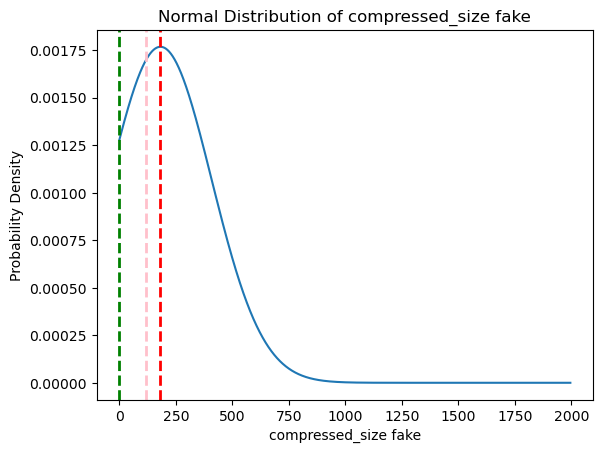

mean :182.07204411764707
mode : 0.705
std: 225.70681748151407
median: 120.1055


In [15]:
com_values_fake = fake_df['compressed_size'].tolist()
div_val = 1000

com_values_fake_div = [x/div_val for x in com_values_fake]

mo = statistics.mode(com_values_fake_div)
me = statistics.median(com_values_fake_div)
mu = np.mean(com_values_fake_div)
sigma = np.std(com_values_fake_div)
x = np.linspace(min(com_values_fake_div), max(com_values_fake_div), 2050)
y = norm.pdf(x, mu, sigma)

# Plot the distribution
plt.plot(x, y)
plt.title('Normal Distribution of compressed_size fake')
plt.xlabel('compressed_size fake')
plt.ylabel('Probability Density')
plt.axvline(mu, color='red', linestyle='dashed', linewidth=2)
plt.axvline(mo, color='green', linestyle='dashed', linewidth=2)
#plt.axvline(sigma, color='pink', linestyle='dashed', linewidth=2)
plt.axvline(me, color='pink', linestyle='dashed', linewidth=2)
plt.show()

print(f'mean :{mu}')
print(f'mode : {mo}')
print(f'std: {sigma}')
print(f'median: {me}')

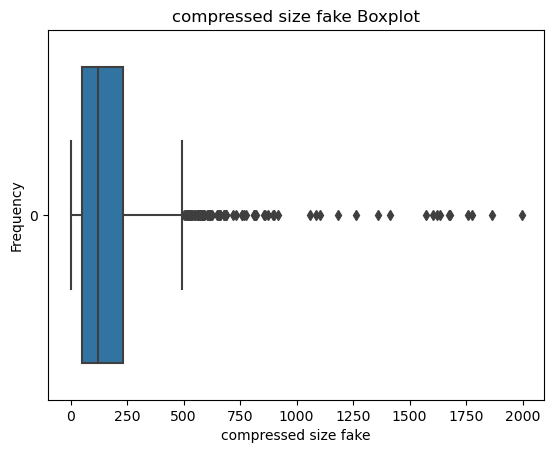

In [16]:
sns.boxplot(com_values_fake_div, orient='h')
plt.title('compressed size fake Boxplot')
plt.xlabel('compressed size fake')
plt.ylabel('Frequency')

# display the plot
plt.show()

In [17]:
com_values_fake_div_formatted = [
    item for item in com_values_fake_div
    if item > 0
    and item < 500
]

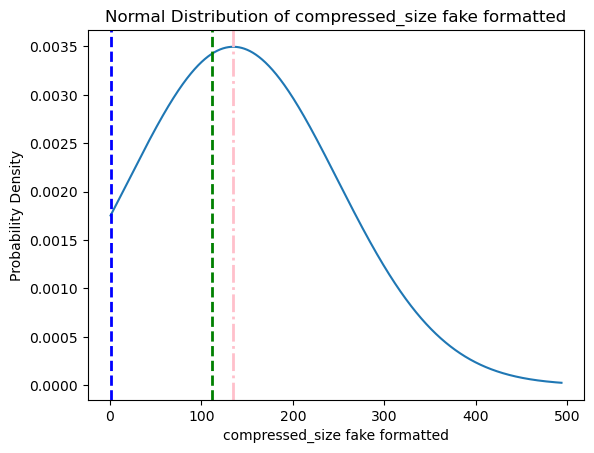

mean :134.79680650542116
mode : 0.705
std: 114.12710522000974
median: 111.214


In [18]:
mo = statistics.mode(com_values_fake_div_formatted)
mu = np.mean(com_values_fake_div_formatted)
sigma = np.std(com_values_fake_div_formatted)
me = statistics.median(com_values_fake_div_formatted)

x = np.linspace(min(com_values_fake_div_formatted), max(com_values_fake_div_formatted), 2050)
y = norm.pdf(x, mu, sigma)

# Plot the distribution
plt.plot(x, y)
plt.title('Normal Distribution of compressed_size fake formatted')
plt.xlabel('compressed_size fake formatted')
plt.ylabel('Probability Density')
plt.axvline(mu, color='pink', linestyle='dashdot', linewidth=2)
plt.axvline(mo, color='blue', linestyle='dashed', linewidth=2)
plt.axvline(me, color='green', linestyle='dashed', linewidth=2)
plt.show()

print(f'mean :{mu}')
print(f'mode : {mo}')
print(f'std: {sigma}')
print(f'median: {me}')

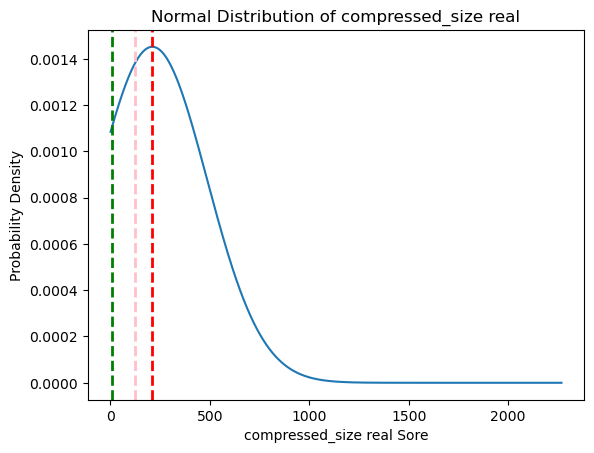

mean :210.64252242744064
mode : 8.005
std: 274.7690736766281
median: 124.2435


In [19]:
com_values_real = real_df['compressed_size'].tolist()
div_val = 1000

com_values_real_div = [x/div_val for x in com_values_real]

mo = statistics.mode(com_values_real_div)
me = statistics.median(com_values_real_div)
mu = np.mean(com_values_real_div)
sigma = np.std(com_values_real_div)
x = np.linspace(min(com_values_real_div), max(com_values_real_div), 2050)
y = norm.pdf(x, mu, sigma)

# Plot the distribution
plt.plot(x, y)
plt.title('Normal Distribution of compressed_size real')
plt.xlabel('compressed_size real Sore')
plt.ylabel('Probability Density')
plt.axvline(mu, color='red', linestyle='dashed', linewidth=2)
plt.axvline(mo, color='green', linestyle='dashed', linewidth=2)
#plt.axvline(sigma, color='pink', linestyle='dashed', linewidth=2)
plt.axvline(me, color='pink', linestyle='dashed', linewidth=2)
plt.show()

print(f'mean :{mu}')
print(f'mode : {mo}')
print(f'std: {sigma}')
print(f'median: {me}')

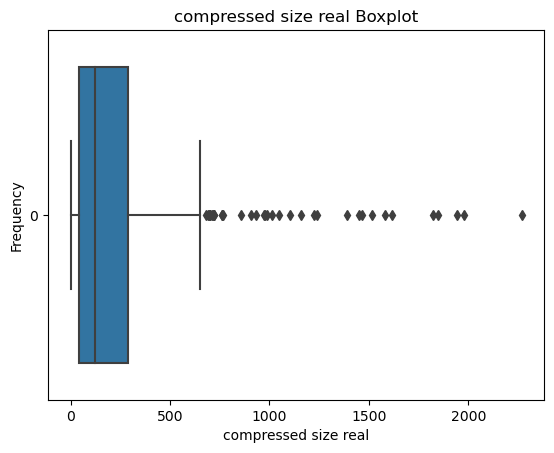

In [20]:
sns.boxplot(com_values_real_div, orient='h')
plt.title('compressed size real Boxplot')
plt.xlabel('compressed size real')
plt.ylabel('Frequency')

# display the plot
plt.show()

In [21]:
com_values_real_div_formatted = [
    item for item in com_values_real_div
    if item > 0
    and item < 520
]

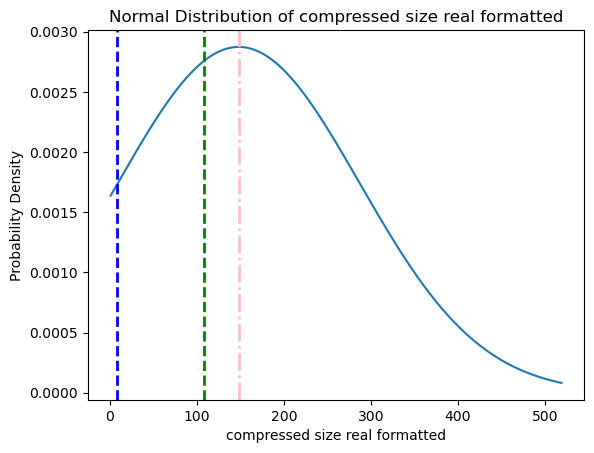

mean :147.94828138528138
mode : 8.005
std: 138.8402711140981
median: 107.554


In [22]:
mo = statistics.mode(com_values_real_div_formatted)
mu = np.mean(com_values_real_div_formatted)
sigma = np.std(com_values_real_div_formatted)
me = statistics.median(com_values_real_div_formatted)

x = np.linspace(min(com_values_real_div_formatted), max(com_values_real_div_formatted), 2050)
y = norm.pdf(x, mu, sigma)

# Plot the distribution
plt.plot(x, y)
plt.title('Normal Distribution of compressed size real formatted')
plt.xlabel('compressed size real formatted')
plt.ylabel('Probability Density')
plt.axvline(mu, color='pink', linestyle='dashdot', linewidth=2)
plt.axvline(mo, color='blue', linestyle='dashed', linewidth=2)
plt.axvline(me, color='green', linestyle='dashed', linewidth=2)
plt.show()

print(f'mean :{mu}')
print(f'mode : {mo}')
print(f'std: {sigma}')
print(f'median: {me}')

### readability histograms

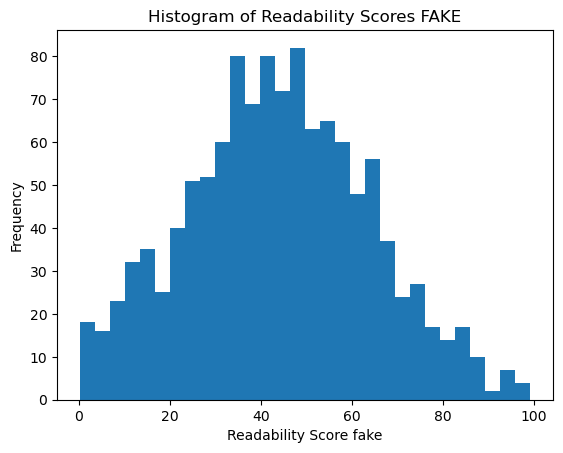

In [23]:
plt.hist(fke_values_fake_formatted, bins=30)
plt.xlabel('Readability Score fake')
plt.ylabel('Frequency')
plt.title('Histogram of Readability Scores FAKE')
plt.show()

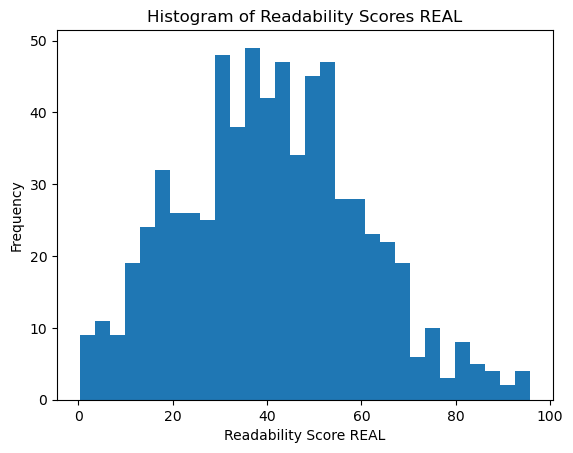

In [24]:
plt.hist(fke_values_real_formatted, bins=30)
plt.xlabel('Readability Score REAL')
plt.ylabel('Frequency')
plt.title('Histogram of Readability Scores REAL')
plt.show()

### Complexity histo

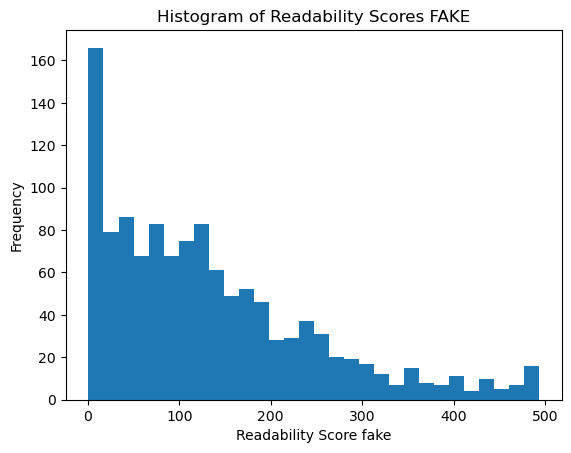

In [25]:
plt.hist(com_values_fake_div_formatted, bins=30)
plt.xlabel('Readability Score fake')
plt.ylabel('Frequency')
plt.title('Histogram of Readability Scores FAKE')
plt.show()

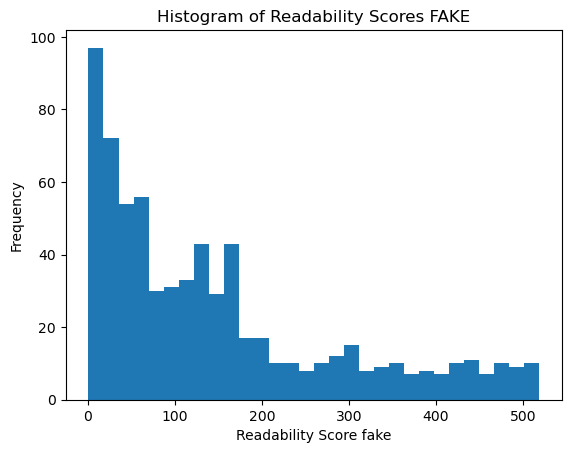

In [26]:
plt.hist(com_values_real_div_formatted, bins=30)
plt.xlabel('Readability Score fake')
plt.ylabel('Frequency')
plt.title('Histogram of Readability Scores FAKE')
plt.show()

## reformat df

In [27]:
print(df_computed_nlp_news)

                                                   text label  \
0     print they should pay all the back all the mon...  Real   
1     why did attorney general loretta lynch plead t...  Real   
2     red state  \nfox news sunday reported this mor...  Real   
3     email kayla mueller was a prisoner and torture...  Real   
4     email healthcare reform to make america great ...  Real   
...                                                 ...   ...   
2045  check out hillarythemed haunted house anticlin...  Real   
2046  good samaritan wearing indian headdress disarm...  Real   
2047  skype sex scam  a fortune built on shame moroc...  Real   
2048  posted by eddie while the skyhigh potency may ...  Real   
2049  billion even after they are known to be keepin...  Real   

      flesch_kincaid_reading_ease  compressed_size  vader_neg  vader_neu  \
0                       67.530000          35501.0      0.091      0.804   
1                        5.889000         107554.0      0.085      

In [28]:
df_computed_nlp_news_format = df_computed_nlp_news[(df_computed_nlp_news["flesch_kincaid_reading_ease"] >= 0) & (df_computed_nlp_news["flesch_kincaid_reading_ease"] <= 100)]


print(df_computed_nlp_news_format)

                                                   text label  \
0     print they should pay all the back all the mon...  Real   
1     why did attorney general loretta lynch plead t...  Real   
2     red state  \nfox news sunday reported this mor...  Real   
3     email kayla mueller was a prisoner and torture...  Real   
5     print hillary goes absolutely berserk she expl...  Real   
...                                                 ...   ...   
2045  check out hillarythemed haunted house anticlin...  Real   
2046  good samaritan wearing indian headdress disarm...  Real   
2047  skype sex scam  a fortune built on shame moroc...  Real   
2048  posted by eddie while the skyhigh potency may ...  Real   
2049  billion even after they are known to be keepin...  Real   

      flesch_kincaid_reading_ease  compressed_size  vader_neg  vader_neu  \
0                       67.530000          35501.0      0.091      0.804   
1                        5.889000         107554.0      0.085      

In [51]:
haaks = df_computed_nlp_news['compressed_size'] / 10000
print(haaks)

0        3.5501
1       10.7554
2        8.7317
3        1.9189
4       12.8083
         ...   
2045     3.6520
2046     7.1114
2047     6.2157
2048    20.6373
2049     1.1877
Name: compressed_size, Length: 2050, dtype: float64


                                                   text label  \
0     print they should pay all the back all the mon...  Real   
1     why did attorney general loretta lynch plead t...  Real   
2     red state  \nfox news sunday reported this mor...  Real   
3     email kayla mueller was a prisoner and torture...  Real   
5     print hillary goes absolutely berserk she expl...  Real   
...                                                 ...   ...   
2045  check out hillarythemed haunted house anticlin...  Real   
2046  good samaritan wearing indian headdress disarm...  Real   
2047  skype sex scam  a fortune built on shame moroc...  Real   
2048  posted by eddie while the skyhigh potency may ...  Real   
2049  billion even after they are known to be keepin...  Real   

      flesch_kincaid_reading_ease  compressed_size  vader_neg  vader_neu  \
0                       67.530000           35.501      0.091      0.804   
1                        5.889000          107.554      0.085      

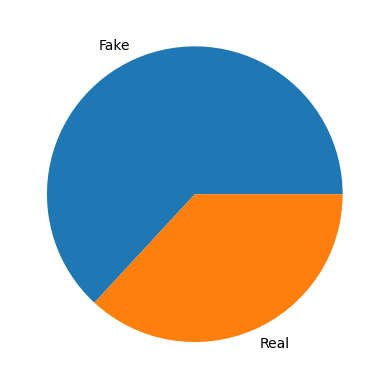

In [31]:
print(df_test)

count_fake = len(df_test[df_test['label']=='Fake'])
print("Number of fake rows:", count_fake)



count_real = len(df_test[df_test['label']=='Real'])
print("Number of real rows:", count_real)



y = np.array([count_fake, count_real])
mylabels = ["Fake", "Real"]

plt.pie(y, labels = mylabels)
plt.show()

In [32]:
#df_filtered = df_test.loc[((df_test['compressed_size'] >= 0) &(df_test['compressed_size'] <= 500)) & (df_test['label'] == 'Fake')]
#df_filtered = df_test.loc[((df_test['compressed_size'] >= 0) &(df_test['compressed_size'] <= 520)) & (df_test['label'] == 'Real')]
                                                         

In [33]:
print(df_test)

                                                   text label  \
0     print they should pay all the back all the mon...  Real   
1     why did attorney general loretta lynch plead t...  Real   
2     red state  \nfox news sunday reported this mor...  Real   
3     email kayla mueller was a prisoner and torture...  Real   
5     print hillary goes absolutely berserk she expl...  Real   
...                                                 ...   ...   
2045  check out hillarythemed haunted house anticlin...  Real   
2046  good samaritan wearing indian headdress disarm...  Real   
2047  skype sex scam  a fortune built on shame moroc...  Real   
2048  posted by eddie while the skyhigh potency may ...  Real   
2049  billion even after they are known to be keepin...  Real   

      flesch_kincaid_reading_ease  compressed_size  vader_neg  vader_neu  \
0                       67.530000           35.501      0.091      0.804   
1                        5.889000          107.554      0.085      

In [59]:
test4 = df_test[(df_test["compressed_size"] >= 0) & (df_test["compressed_size"] <= 300)]


In [60]:
print(test4)

                                                   text label  \
0     print they should pay all the back all the mon...  Real   
1     why did attorney general loretta lynch plead t...  Real   
2     red state  \nfox news sunday reported this mor...  Real   
3     email kayla mueller was a prisoner and torture...  Real   
5     print hillary goes absolutely berserk she expl...  Real   
...                                                 ...   ...   
2045  check out hillarythemed haunted house anticlin...  Real   
2046  good samaritan wearing indian headdress disarm...  Real   
2047  skype sex scam  a fortune built on shame moroc...  Real   
2048  posted by eddie while the skyhigh potency may ...  Real   
2049  billion even after they are known to be keepin...  Real   

      flesch_kincaid_reading_ease  compressed_size  vader_neg  vader_neu  \
0                       67.530000           35.501      0.091      0.804   
1                        5.889000          107.554      0.085      

In [61]:
df_computed_nlp_news_formated_complete = test4[(test4["flesch_kincaid_reading_ease"] >= 0) & (test4["flesch_kincaid_reading_ease"] <= 100)]


print(df_computed_nlp_news_formated_complete)

                                                   text label  \
0     print they should pay all the back all the mon...  Real   
1     why did attorney general loretta lynch plead t...  Real   
2     red state  \nfox news sunday reported this mor...  Real   
3     email kayla mueller was a prisoner and torture...  Real   
5     print hillary goes absolutely berserk she expl...  Real   
...                                                 ...   ...   
2045  check out hillarythemed haunted house anticlin...  Real   
2046  good samaritan wearing indian headdress disarm...  Real   
2047  skype sex scam  a fortune built on shame moroc...  Real   
2048  posted by eddie while the skyhigh potency may ...  Real   
2049  billion even after they are known to be keepin...  Real   

      flesch_kincaid_reading_ease  compressed_size  vader_neg  vader_neu  \
0                       67.530000           35.501      0.091      0.804   
1                        5.889000          107.554      0.085      

Number of fake rows: 989
Number of real rows: 522


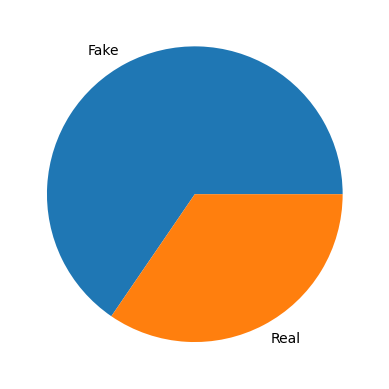

In [62]:
count_fake = len(df_computed_nlp_news_formated_complete[df_computed_nlp_news_formated_complete['label']=='Fake'])
print("Number of fake rows:", count_fake)



count_real = len(df_computed_nlp_news_formated_complete[df_computed_nlp_news_formated_complete['label']=='Real'])
print("Number of real rows:", count_real)



y = np.array([count_fake, count_real])
mylabels = ["Fake", "Real"]

plt.pie(y, labels = mylabels)
plt.show()

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [64]:
# Select relevant features
features = ['flesch_kincaid_reading_ease', 'compressed_size', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']
X = df_computed_nlp_news[features]

# Create the target variable
y = df_computed_nlp_news['label_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features and normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
model = GaussianNB()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
cm =confusion_matrix(y_test, y_pred)

Accuracy: 0.5975609756097561


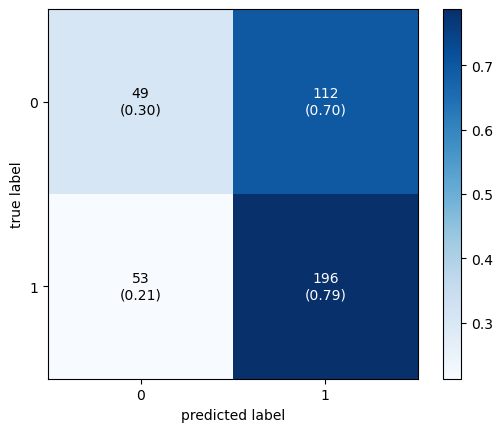

In [66]:
print('Accuracy:', accuracy)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

In [67]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)


Accuracy: 0.6219512195121951


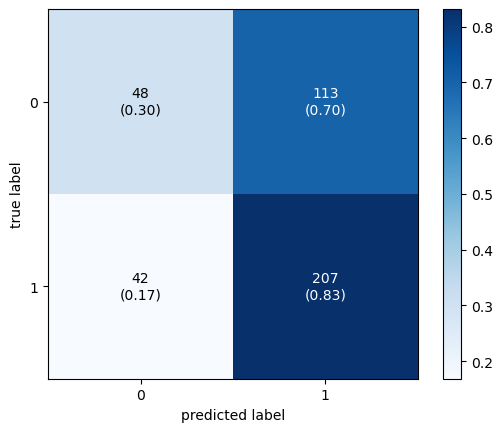

In [68]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


cm_2 =confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm_2,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
